In [1]:
library(car)
library(WRS2)
library(pgirmess)
library(multcomp)

Loading required package: carData
Registered S3 method overwritten by 'pgirmess':
  method   from
  print.mc mc2d
Loading required package: mvtnorm
Loading required package: survival
Loading required package: TH.data
Loading required package: MASS

Attaching package: 'TH.data'

The following object is masked from 'package:MASS':

    geyser



In [2]:
d <- read.csv('DS2DK.csv')

In [3]:
d['category1'] <- lapply(d['category1'], as.factor)
d['category2'] <- lapply(d['category2'], as.factor)

In [4]:
head(d)

traitX,traitY,traitZ,itemA,itemB,itemC,itemD,itemE,itemF,itemG,category1,category2,category3
40,66,39,0,0,0,0,1,0,1,4,6,Bow
27,54,43,0,0,0,1,1,0,0,5,6,Apple
52,35,43,0,0,0,0,0,0,1,2,10,Elephant
61,33,43,0,0,1,1,0,1,0,1,6,Elephant
47,46,48,0,0,1,0,1,1,0,3,2,Dog
47,49,52,0,0,0,1,1,1,1,3,6,Cat


In [5]:
summary(d)

     traitX          traitY          traitZ          itemA      
 Min.   :16.00   Min.   :16.00   Min.   :24.00   Min.   :0.000  
 1st Qu.:39.00   1st Qu.:43.00   1st Qu.:46.00   1st Qu.:0.000  
 Median :45.00   Median :51.00   Median :50.00   Median :0.000  
 Mean   :45.01   Mean   :50.33   Mean   :49.97   Mean   :0.477  
 3rd Qu.:51.00   3rd Qu.:58.00   3rd Qu.:54.00   3rd Qu.:1.000  
 Max.   :82.00   Max.   :90.00   Max.   :73.00   Max.   :1.000  
                                                                
     itemB           itemC           itemD           itemE      
 Min.   :0.000   Min.   :0.000   Min.   :0.000   Min.   :0.000  
 1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000   1st Qu.:0.000  
 Median :0.000   Median :0.000   Median :0.000   Median :0.000  
 Mean   :0.491   Mean   :0.473   Mean   :0.479   Mean   :0.498  
 3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000   3rd Qu.:1.000  
 Max.   :1.000   Max.   :1.000   Max.   :1.000   Max.   :1.000  
                         

In [6]:
unique(d$category3)

[1] Bow      Apple    Elephant Dog      Cat     
Levels: Apple Bow Cat Dog Elephant

### Q1: Do traits differ by categories 2 and 3?

1. Is **average** value of each `trait` (taken individually) different for at least one of the groups represented in `category 2`?
1. Is **average** value of each `trait` (taken individually) different for at least one of the groups represented in `category 3`?

Looks like ANOVA or K-W.

--------------

In [7]:
DA2Q1 <- function(trait, category){
    # leveneTest(trait, category, center=median)

    if(leveneTest(trait, category, center=median)$`Pr(>F)` < 0.5){
        # cat('HoV violated!\n\n')
        # kruskal.test(trait ~ category)
        cat('P-value is',kruskal.test(trait ~ category)$p.value,'\n')
        if(kruskal.test(trait ~ category)$p.value < 0.05){
            cat('There is a difference!\n')
            pairwise.p.value <- pairwise.t.test(trait, category, paired = FALSE, p.adjust.method = "bonferroni")$p.value
            pairwise.p.value[is.na(pairwise.p.value)] <- 1
                for(e in pairwise.p.value){
                    if(e < 0.001){
                        pairwise.p.value[pairwise.p.value==e] <- '***'
                    } else if(e < 0.01){
                        pairwise.p.value[pairwise.p.value==e] <- ' **'
                    } else if(e < 0.05){
                        pairwise.p.value[pairwise.p.value==e] <- '  *'
                    } else if(e < 0.1){
                        pairwise.p.value[pairwise.p.value==e] <- '  .'
                    } else{
                        pairwise.p.value[pairwise.p.value==e] <- '   '
                    }
                }
            return(pairwise.p.value)
        } else cat('No difference!\n')
    }
}

In [8]:
options(warn=-1)
traits <- c('traitX', 'traitY', 'traitZ')
categories <- c('category2', 'category3')

for(category in categories){
    cat('For', category,':\n')
    for(trait in traits){
        cat('For', trait,':\n\n')
        p.values <- DA2Q1(d[[trait]], d[[category]])
        if(!is.null(p.values)){
            print(p.values, quote=F)
        }
        cat('------------------------------------\n\n')
    }
    cat('========================================\n\n')
}
options(warn=0)

For category2 :
For traitX :

P-value is 5.578058e-22 
There is a difference!
   1   2   3   4   5   6   7   8   9  
2  ***                                
3  ***                                
4  ***                                
5  ***                                
6  ***                                
7  ***                                
8  ***                                
9  ***                                
10 ***                                
------------------------------------

For traitY :

P-value is 1.823228e-27 
There is a difference!
   1   2   3   4   5   6   7   8   9  
2                                     
3  *** ***                            
4  *** ***                            
5  *** ***                            
6      ***         ***                
7          ***  ** ***                
8       **   *     ***                
9          *** *** ***                
10         *** *** ***                
------------------------------------

For 

Signif. codes:  `0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1`

### Q2: When controlling for category1 do the traits differ by categories 2 and 3?

1. Is average value of each trait (taken individually) different for at least one of the groups represented in category 2, while controlling for category 1?  
1. Is average value of each trait (taken individually) different for at least one of the groups represented in category 3, while controlling for category 1?

In [9]:
# d <- d[sample(nrow(d), 600), ]

In [10]:
model <- aov(traitY ~ category1 + category2, data=d)
Anova(model, type="III")

,Sum Sq,Df,F value,Pr(>F)
(Intercept),125444.21,1,1182.16756,6.664699e-171
category1,10726.61,4,25.27149,5.941082e-20
category2,18644.01,9,19.52205,2.528049e-30
Residuals,104628.14,986,NA,NA


In [11]:
hoRS <- aov(traitX ~ category1 * category2, data = d)
summary(hoRS)

                     Df Sum Sq Mean Sq F value Pr(>F)    
category1             4   8055  2013.8  32.248 <2e-16 ***
category2             9  10524  1169.4  18.726 <2e-16 ***
category1:category2  36   1491    41.4   0.663  0.937    
Residuals           950  59325    62.4                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [12]:
check <- aov(as.numeric(category1) ~ as.numeric(category2), data = d)
summary(check)

                       Df Sum Sq Mean Sq F value Pr(>F)
as.numeric(category2)   1    1.6   1.610   0.798  0.372
Residuals             998 2013.3   2.017               

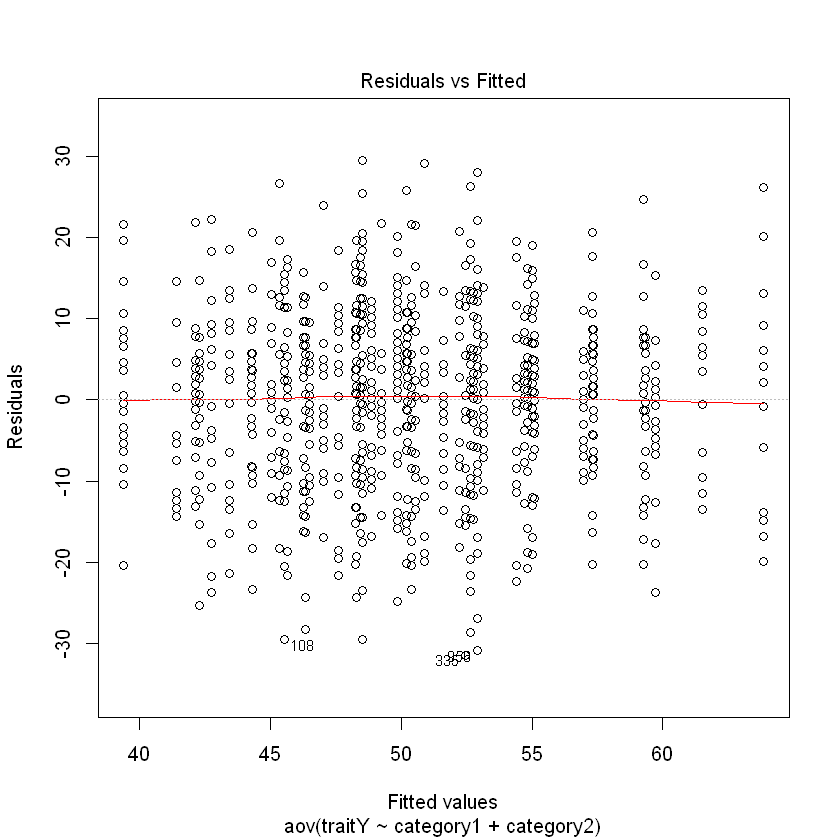

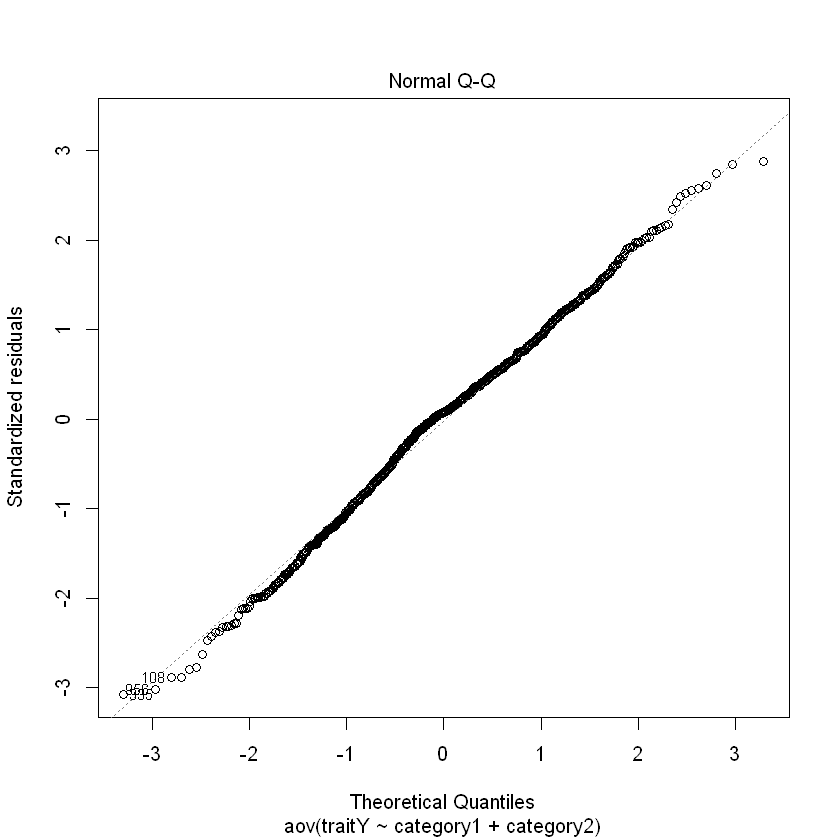

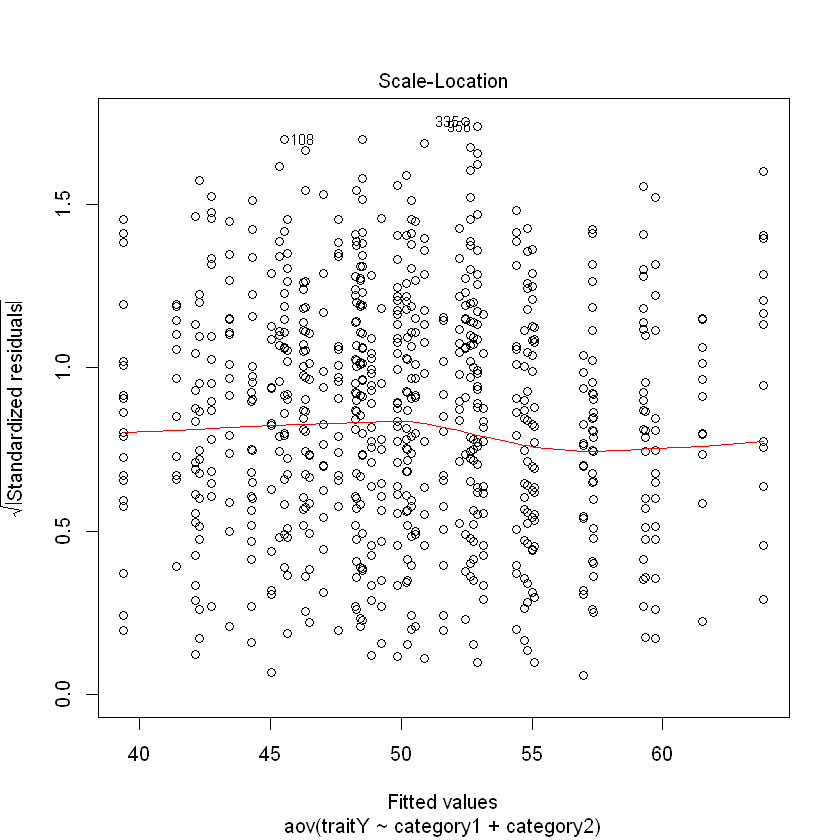

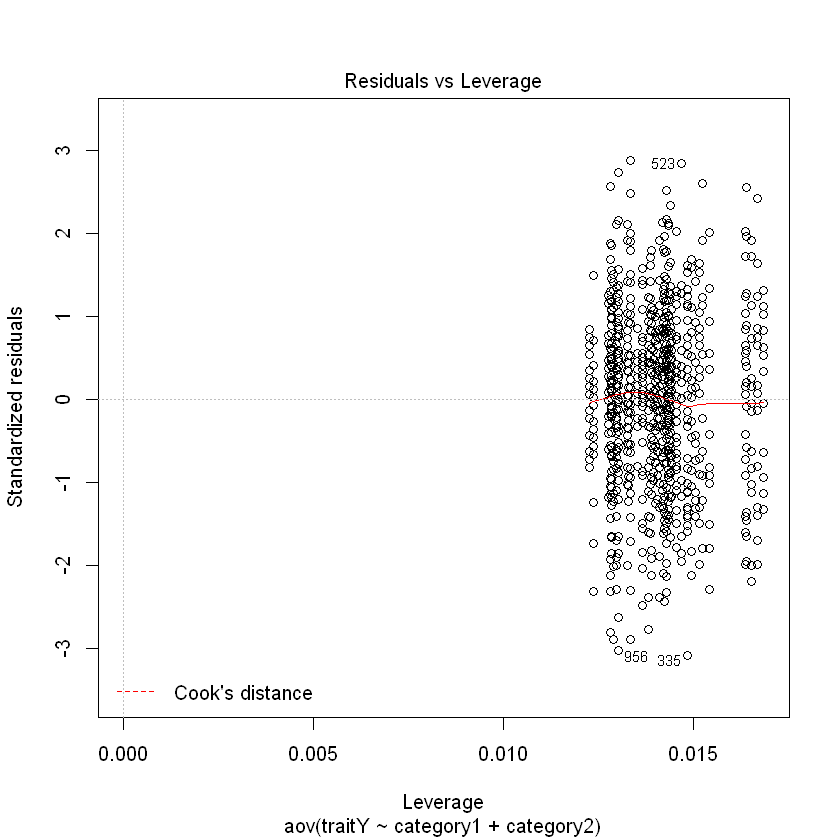

In [13]:
plot(model)

In [14]:
model <- aov(traitY ~ category1 + category2, data=d)
postHocs <- glht(model, linfct = mcp(category2 = "Tukey")) #library multcomp
summary(postHocs)
confint(postHocs)

Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"Warning message in RET$pfunction("adjusted", ...):
"Completion with error > abseps"


	 Simultaneous Tests for General Linear Hypotheses

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = traitY ~ category1 + category2, data = d)

Linear Hypotheses:
            Estimate Std. Error t value Pr(>|t|)    
2 - 1 == 0   -2.7507     1.4421  -1.907  0.66404    
3 - 1 == 0    8.0926     1.4187   5.704  < 0.001 ***
4 - 1 == 0    7.7102     1.4723   5.237  < 0.001 ***
5 - 1 == 0   12.2550     1.5563   7.875  < 0.001 ***
6 - 1 == 0    3.2053     1.4913   2.149  0.49224    
7 - 1 == 0    1.2965     1.4640   0.886  0.99687    
8 - 1 == 0    3.3986     1.4332   2.371  0.34347    
9 - 1 == 0    0.5990     1.4802   0.405  1.00000    
10 - 1 == 0  -0.7304     1.4915  -0.490  0.99998    
3 - 2 == 0   10.8433     1.3781   7.868  < 0.001 ***
4 - 2 == 0   10.4609     1.4341   7.294  < 0.001 ***
5 - 2 == 0   15.0057     1.5204   9.870  < 0.001 ***
6 - 2 == 0    5.9560     1.4510   4.105  0.00173 ** 
7 - 2 == 0    4.0471     1.4236   2.843  0.12297    
8 - 2 == 0    6.1493  


	 Simultaneous Confidence Intervals

Multiple Comparisons of Means: Tukey Contrasts


Fit: aov(formula = traitY ~ category1 + category2, data = d)

Quantile = 3.1697
95% family-wise confidence level
 

Linear Hypotheses:
            Estimate lwr      upr     
2 - 1 == 0   -2.7507  -7.3217   1.8203
3 - 1 == 0    8.0926   3.5956  12.5896
4 - 1 == 0    7.7102   3.0434  12.3770
5 - 1 == 0   12.2550   7.3220  17.1879
6 - 1 == 0    3.2053  -1.5217   7.9324
7 - 1 == 0    1.2965  -3.3439   5.9369
8 - 1 == 0    3.3986  -1.1443   7.9415
9 - 1 == 0    0.5990  -4.0928   5.2908
10 - 1 == 0  -0.7304  -5.4581   3.9973
3 - 2 == 0   10.8433   6.4750  15.2115
4 - 2 == 0   10.4609   5.9151  15.0066
5 - 2 == 0   15.0057  10.1864  19.8249
6 - 2 == 0    5.9560   1.3567  10.5553
7 - 2 == 0    4.0471  -0.4653   8.5596
8 - 2 == 0    6.1493   1.7337  10.5649
9 - 2 == 0    3.3497  -1.2237   7.9230
10 - 2 == 0   2.0203  -2.5860   6.6266
4 - 3 == 0   -0.3824  -4.8511   4.0863
5 - 3 == 0    4.1624  -0.5880   8.912

In [15]:
leveneTest(d$traitX, d$category2, center=median)

,Df,F value,Pr(>F)
group,9,2.820711,0.002804713
,990,NA,NA
